# Erwan LeCun
# PUI_HW5-2_ErwanLeCun

In [1]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import json
from scipy import stats
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
allmales={}
allfemales={}

allmales['all']=pd.read_excel(os.path.expandvars('$PUI2015/pinc08_2_1_1.xls'), header=9)
allmales['white']=pd.read_excel(os.path.expandvars('$PUI2015/pinc08_2_1_4.xls'), header=9)
allmales['black']=pd.read_excel(os.path.expandvars('$PUI2015/pinc08_2_1_6.xls'), header=9)
allmales['hispanic']=pd.read_excel(os.path.expandvars('$PUI2015/pinc08_2_1_9.xls'), header=9)
allmales['asian']=pd.read_excel(os.path.expandvars('$PUI2015/pinc08_2_1_8.xls'), header=9)

allfemales['all']=pd.read_excel(os.path.expandvars('$PUI2015/pinc08_3_1_1.xls'), header=9)
allfemales['white']=pd.read_excel(os.path.expandvars('$PUI2015/pinc08_3_1_4.xls'), header=9)
allfemales['black']=pd.read_excel(os.path.expandvars('$PUI2015/pinc08_3_1_6.xls'), header=9)
allfemales['hispanic']=pd.read_excel(os.path.expandvars('$PUI2015/pinc08_3_1_9.xls'), header=9)
allfemales['asian']=pd.read_excel(os.path.expandvars('$PUI2015/pinc08_3_1_8.xls'), header=9)

In [3]:
# Remove nonreal entries using a for loop and np.isreal function 

from pandas.tools.plotting import scatter_matrix

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)
            
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/Users/erwan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/erwan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
# Input wage & salary median income data into arrays

m_all = allmales['all']['Median income'][3]
m_w = allmales['white']['Median income'][3]
m_b = allmales['black']['Median income'][3]
m_h = allmales['hispanic']['Median income'][3]
m_a = allmales['asian']['Median income'][3]

m_median = np.array([m_all, m_w, m_b, m_h, m_a])

f_all = allfemales['all']['Median income'][3]
f_w = allfemales['white']['Median income'][3]
f_b = allfemales['black']['Median income'][3]
f_h = allfemales['hispanic']['Median income'][3]
f_a = allfemales['asian']['Median income'][3]

f_median = np.array ([f_all, f_w, f_b, f_h, f_a])

In [5]:
# Scatter Matrix for data - for some reason this code takes a very, very long time to execute
# For this reason, I will leave the function call commented

# scatter_matrix (allmales['all'], s=300, figsize=(16, 16), diagonal='kde')

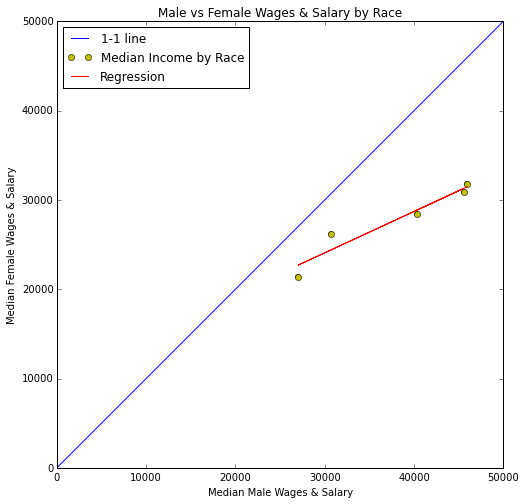

In [6]:
# Plot median income (wages & salary) by race (male vs female)
# Plot regression line for income data
# Plot 1-1 line

fig = pl.figure(figsize=(8, 8))
pl.scatter(m_median, f_median)
pl.plot([1,50000], [1,50000], label = '1-1 line')
pl.xlim([0, 50000])
pl.ylim([0, 50000])
pl.xlabel('Median Male Wages & Salary')
pl.ylabel('Median Female Wages & Salary')
pl.title('Male vs Female Wages & Salary by Race')

m, b = np.polyfit(m_median, f_median, 1)

pl.plot(m_median, f_median, 'yo', label = 'Median Income by Race')
pl.plot(m_median, m * m_median + b, 'r', label = 'Regression')

pl.legend(loc = 'upper left')

In [7]:
x = sm.add_constant(m_median)
model = sm.OLS(f_median, x)
fit = model.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     36.94
Date:                Fri, 16 Oct 2015   Prob (F-statistic):            0.00894
Time:                        01:09:08   Log-Likelihood:                -41.744
No. Observations:                   5   AIC:                             87.49
Df Residuals:                       3   BIC:                             86.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.017e+04   2949.656      3.449      0.0

/Users/erwan/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


In [8]:
cor = stats.spearmanr(m_median, f_median)

beta1 = cor[0] * f_median.std() / m_median.std()
beta0 = f_median.mean() - beta1 * m_median.mean()

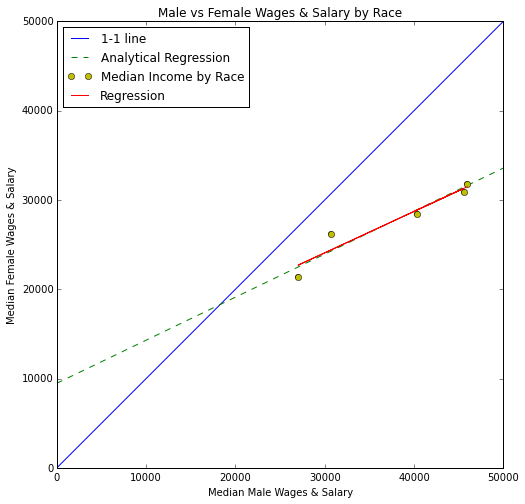

In [9]:
# Plot median income (wages & salary) by race (male vs female)
# Plot regression line for income data
# plot analytical regression line for income data
# Plot 1-1 line

fig = pl.figure(figsize=(8, 8))
pl.scatter(m_median, f_median)
pl.plot([1,50000], [1,50000], label = '1-1 line')
pl.xlim([0, 50000])
pl.ylim([0, 50000])
pl.xlabel('Median Male Wages & Salary')
pl.ylabel('Median Female Wages & Salary')
pl.title('Male vs Female Wages & Salary by Race')

min = 0
max = 50000

pl.plot([min, max], [min*beta1+beta0, max*beta1+beta0], linestyle='--', label = 'Analytical Regression')

m, b = np.polyfit(m_median, f_median, 1)
pl.plot(m_median, f_median, 'yo', label = 'Median Income by Race')
pl.plot(m_median, m * m_median + b, 'r', label = 'Regression')

pl.legend(loc = 'upper left')

In [10]:
all_males = np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females = np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

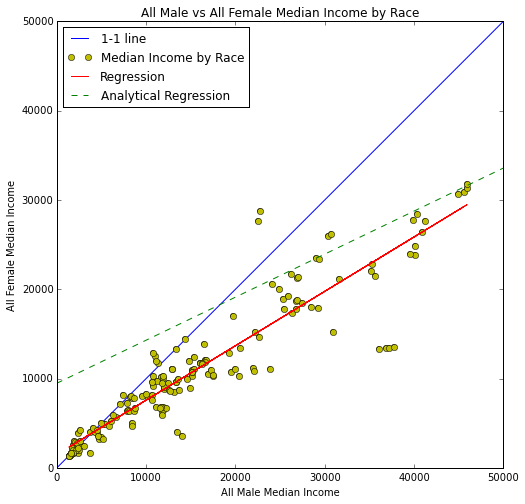

In [11]:
# Plot all median income by race (male vs female)
# Plot regression line for income data
# plot analytical regression line for income data
# Plot 1-1 line

fig = pl.figure(figsize=(8, 8))
pl.plot([1,50000], [1,50000], label = '1-1 line')
pl.xlim([0, 50000])
pl.ylim([0, 50000])
pl.xlabel('All Male Median Income')
pl.ylabel('All Female Median Income')
pl.title('All Male vs All Female Median Income by Race')
pl.scatter(all_males[~all_males.mask], all_females[~all_females.mask])

m, b = np.polyfit(all_males[~all_males.mask], all_females[~all_females.mask], 1)
pl.plot(all_males[~all_males.mask], all_females[~all_females.mask], 'yo', label = 'Median Income by Race')
pl.plot(all_males[~all_males.mask], m * all_males[~all_males.mask] + b, 'r', label = 'Regression')
pl.plot([min, max], [min*beta1+beta0, max*beta1+beta0], linestyle='--', label = 'Analytical Regression')

pl.legend(loc = 'upper left')

### We can see from this plot that the total median income line is different from the all forms of income line.
### We can conclude from this that total median income is NOT representative of all forms of income.
### This is mostly due to the face that the median income line is pushed upwards by a higher intercept compared to the total median income line.  
### The slopes of the two lines are relatively similar.
### There are a few high leverage points (where there are huge discrepancies between incomes), but the regression line is seemingly unaffected by these points.

In [12]:
x = sm.add_constant(all_males[~all_males.mask])
model = sm.OLS(all_females[~all_females.mask], x)
fit = model.fit()
print fit.summary()
intercept, slope = fit.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Fri, 16 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        01:09:09   Log-Likelihood:                -1668.8
No. Observations:                 178   AIC:                             3342.
Df Residuals:                     176   BIC:                             3348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1493.0394    351.359      4.249      0.0

### Ideal Stipend

In [13]:
ideal_stipend = 75000
woman_stipend = ideal_stipend*slope + intercept
print woman_stipend

47169.5787125


### Looking at the total median income data, we can see that:
### Across all races, female median income is less than male median income.
### White and Asian males have the highest income and make about 50% more than their female counterparts.
### Black and Hispanic males have around the same income (maybe a little less) as White and Asian females.
### Black and Hispanic females make around 25%-30% less than their male counterparts.

### In order to examine race income demographics more completely it would maybe be best to look at the data for all income by race and slice by gender. That would give us a lot more data to analyze and give us a better picture.